In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve

In [143]:
np.random.seed(1)
X = np.random.randn(100,2)
# X[:,1]+=3.5

X[:,1]*=1.6
X[:,1]+=3


X, y = X.flatten('F')[...,np.newaxis], np.array([[0]*100,[1]*100]).flatten()

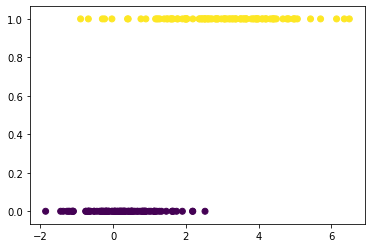

In [144]:
plt.scatter(X,y,c=y)

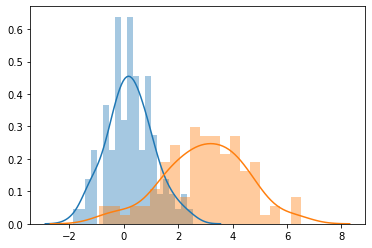

In [145]:
sns.distplot(X[y==0],20,kde=True)
sns.distplot(X[y==1],20,kde=True)

In [146]:
logisticR = LogisticRegression()
y_pred = logisticR.fit(X,y).predict_proba(X)

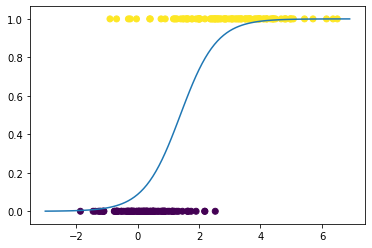

In [147]:
xs = np.arange(-3,7,0.1)[...,np.newaxis]
plt.scatter(X,y,c=y)
plt.plot(xs, logisticR.predict_proba(xs)[:,1])

In [148]:
def tpr_fpr(thres, X=X, y=y):
    tn = len(X[(y==0) & (X.flatten()<thres)])
    fp = len(X[(y==0) & (X.flatten()>thres)])
    tp = len(X[(y==1) & (X.flatten()>thres)])
    fn = len(X[(y==1) & (X.flatten()<thres)])
    return tp/(tp+fn), fp/(tn+fp), tp/(tp+fp+0.0000001)

In [149]:
X[(y==0) & (X.flatten()<1)].shape

(83, 1)

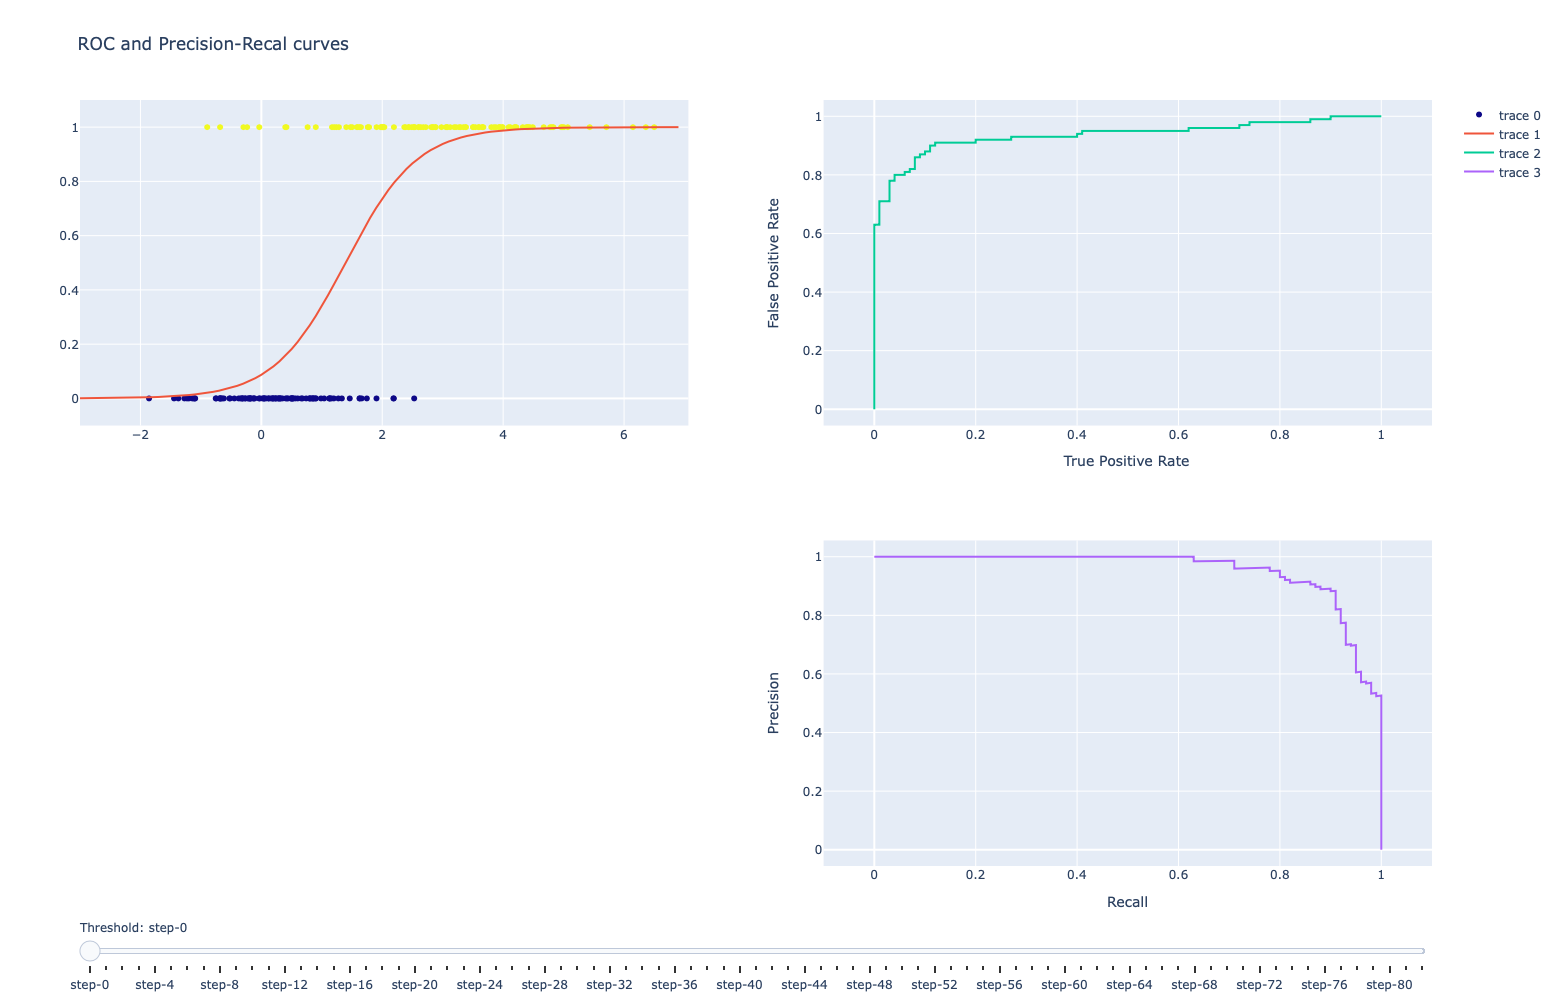

In [150]:
fig = make_subplots(rows=2,cols=2)

fig.add_trace(go.Scatter(x=X.flatten(),y=y, mode='markers',marker=dict(color=y)),row=1,col=1)
fig.add_trace(go.Scatter(x=xs.flatten(),y=logisticR.predict_proba(xs)[:,1]), row=1,col=1)
fig.add_trace(go.Scatter(x=roc_curve(y,y_pred[:,1])[0],y=roc_curve(y,y_pred[:,1])[1]), row=1,col=2)
fig.add_trace(go.Scatter(x=[1, *precision_recall_curve(y,y_pred[:,1])[1].tolist()],
                         y=[0, *precision_recall_curve(y,y_pred[:,1])[0].tolist()]), row=2,col=2)

xs2 = xs[8:-5]
for x_o, y_o in zip(xs2.flatten(), logisticR.predict_proba(xs2)[:,1].flatten()):
    fig.add_trace(go.Scatter(x=[x_o,x_o], y=[-.05,1.05], marker=dict(color='black'),visible=False),row=1,col=1)
    
    tpr, fpr, precision = tpr_fpr(x_o)
    fig.add_trace(go.Scatter(x=[fpr], y=[tpr], marker=dict(color='black'),visible=False),row=1,col=2)
    fig.add_trace(go.Scatter(x=[tpr], y=[precision], marker=dict(color='black'),visible=False),row=2,col=2)
steps = []

for i in range(len(xs2)):
    step = dict( method = 'restyle',
               args = ['visible', [True]*4+[False]*len(xs2)*3])
    step['args'][1][3*i] = True
    step['args'][1][3*i-1] = True
    step['args'][1][3*i-2] = True
    steps.append(step)

sliders = [dict(
                active = 0,
                currentvalue = {"prefix":"Threshold: "},
                pad = {"t":50},
                steps = steps[4:])]

fig.update_yaxes(range=(-0.1,1.1), row=1,col=1)
fig.update_xaxes(range=(-0.1,1.1), title='True Positive Rate',row=1,col=2)
fig.update_yaxes(title='False Positive Rate',row=1,col=2)
fig.update_xaxes(range=(-0.1,1.1),title='Recall',row=2,col=2)
fig.update_yaxes(title='Precision',row=2,col=2)
fig.update_layout(height=1000, width=1400, title_text='ROC and Precision-Recal curves', sliders=sliders)
fig.show()